In [938]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [939]:
df = pd.read_csv('Gradient_Descent_Data.csv')

In [940]:
df_normalised = (df - df.min())/(df.max()-df.min()) # normalizing the dataset
df_normalised['int'] = 1 # adding an intercept term

df_normalised

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,int
0,0.815639,0.850000,0.105528,0.270677,0.366667,0.6500,0.435,0.949875,0.9425,0.095,0.882206,0.437186,1
1,0.551610,0.120000,0.396985,0.969925,0.583333,0.8250,0.340,0.912281,0.9250,0.795,0.097744,0.482412,1
2,0.353082,0.283333,0.778894,0.756892,0.850000,0.9450,0.050,0.268170,0.3775,0.595,0.303258,0.437186,1
3,0.239374,0.266667,0.517588,0.285714,0.723333,0.1100,0.780,0.744361,0.1100,0.725,0.095238,0.567839,1
4,0.318307,0.820000,0.763819,0.431078,0.670000,0.1425,0.570,0.080201,0.8575,0.085,0.022556,0.874372,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.214351,0.610000,0.547739,0.288221,0.950000,0.7725,0.355,0.248120,0.3725,0.280,0.100251,0.055276,1
396,0.470101,0.260000,0.457286,0.230576,0.923333,0.2150,0.845,0.533835,0.9225,0.420,0.205514,0.562814,1
397,0.530819,0.240000,0.000000,0.057644,0.550000,0.2500,0.155,0.952381,0.3825,0.305,0.894737,0.256281,1
398,0.843054,0.966667,0.879397,0.200501,0.353333,0.5850,0.270,0.814536,0.9850,0.555,0.749373,0.326633,1


0.07533348367431136


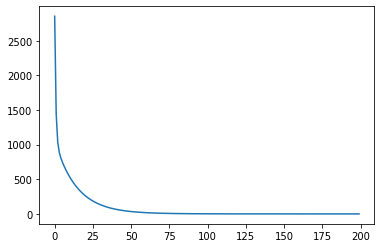

In [941]:
Y = df_normalised['Y'].to_numpy()              # Converting into a scaled target variable
Y = Y.reshape(-1,1)                            # Reshaping since numpy ignores single dimension
X = df_normalised.iloc[:,1:].to_numpy()        # Converting into a scaled feature variables
Coeff = np.random.standard_normal(X.shape[1])  # Initiation weights
Coeff = Coeff.reshape(-1, 1)                   # Reshaping since numpy ignores single dimension
i = 0                                          # Epoch Start
Loss = []                                      # Placeholder for Loss
while i < 200:
    S_1 = Y - np.matmul(X,Coeff)               #Y - XB
    Loss.append(np.matmul(S_1.transpose(),S_1).item()) #LOSS = (Y - XB)T x (Y - XB)
    update_coeff = np.matmul(S_1.transpose(),-X) # COEFF_UPDATE = (Y - XB)T x -X
    Coeff-= 0.001*update_coeff.transpose()     # UPDATED_COEFF = CURRENT_COEFF - LEARNING_RATE*COEFF_UPDATE
    i+=1
plt.plot(Loss)
print(Loss[-1])

In [942]:
coeff_list = []                                                  # Placeholder for the loss calculated
rescale = (df.max()-df.min()).to_list()[1:]                      # The Max - Min for every feature
rescale = [(df.max()-df.min()).to_list()[0]/x for x in rescale]  # UNSCALING_FACTOR = The Max - Min of Target/The Max - Min for every feature
rescale.append(1)                                                # Since intercept variable is 1 and was not scaled
for i,c in enumerate(Coeff):
    coeff_list.append(c[0]*rescale[i])                           # For all the coeffecients the respective scaling factors are applied  
coeff_list

[2.7489905851950556,
 1.639775888702152,
 1.3182047649037394,
 2.273839748275896,
 0.33917792106229666,
 1.2513815223370035,
 2.967918117042769,
 3.8742188864227254,
 2.8498270451301044,
 5.7993695391534645,
 0.8534794431740522,
 -0.31028018603035806]

In [943]:
# CHECKING FOR RMSE

X = df.iloc[:,1:]                                    # FEATURE MATRIX
X['int'] = 1                                         # ADDING INTERCEPT
X = X.to_numpy()                                     # CONVERTING TO MATRIX
coeff_array = np.asarray(coeff_list)                 # CONVERTING COEFFS INTO MATRIX
e = df['Y'].to_numpy() - np.matmul(X, coeff_array)   # Error = Y - Ypred i.e. Y - XB
print(f"RMSE: {np.sqrt(np.matmul(e.transpose(),e))}")                  # RMSE = sqrt(e_transpose x e)
Y = df['Y'].to_numpy()
Y_pred = np.matmul(X, coeff_array)

print(f"R squared:{1 - (np.matmul((Y - Y_pred).transpose(),(Y - Y_pred))/np.matmul((Y - np.mean(Y)).transpose(),(Y - np.mean(Y))))}")

RMSE: 24603.33205805776
R squared:-0.4523287311501525


In [601]:
# Implementation of Momentum
# With every epoch we will store the weight in a list
# For ith epoch the weight update would be: ΣB^(n-t).weight_update(t)
# Ex: i = 4
# B^(4-1).weight_update(1) + B^(4-2).weight_update(2) + B^(4-3).weight_update(3) + B^(4-4).weight_update(4)

1.4532078515030697e-06


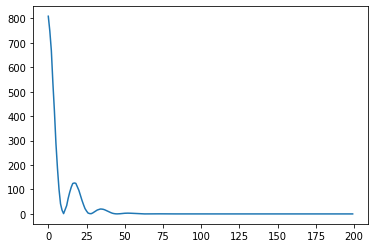

In [924]:
df = pd.read_csv('Gradient_Descent_Data.csv')
df_normalised = (df - df.min())/(df.max()-df.min()) # normalizing the dataset
df_normalised['int'] = 1 # adding an intercept term

learning_rate = 0.001
momentum_param = 0.9

gradient_list = []
weight_update_list = []
loss_list = []

#X*Beta
Y = df_normalised.iloc[:,0].to_numpy()
Y = Y.reshape(-1,1)
X = df_normalised.iloc[:,1:].to_numpy()
Beta = np.random.standard_normal(X.shape[1])
Beta = Beta.reshape(-1,1)
epoch = 0
while epoch <200:    
    #Y-XB
    error = Y-np.matmul(X,Beta)
    #Sum of Error Squared
    loss_list.append(np.matmul(error.transpose(),error).item())
    #Gradient: (Y-XB)tranpose x -X
    Gradient = np.matmul(error.transpose(),-X).transpose()
    gradient_list.append(Gradient)                                                   # This is where we store the gradients for each epoch
    len_gradient_list = len(gradient_list)
    weight_update_list = []
    for i,g in enumerate(gradient_list):
        weight_update_list.append((momentum_param**(len_gradient_list - (i+1)))*g)   # To each of the gradient steps multiply the momentum parameter^distance of the epoch`

    weight_update = learning_rate*np.sum(weight_update_list, axis = 0)
    #weight_update = learning_rate*Gradient
    Beta -= weight_update
    epoch+=1
    
print(loss_list[-1])
plt.plot(loss_list)

In [925]:
# UNSCALE THE WEIGHTS
numerator = (df['Y'].max()-df['Y'].min())
denominator = (df.iloc[:,1:].max() - df.iloc[:,1:].min())
#denominator['int']=1
unscaled_param = numerator/denominator
unscaled_param = unscaled_param.to_list()#.to_numpy().reshape(-1,1)
unscaled_param.append(1)
unscaled_param = np.array(unscaled_param).reshape(-1,1)
unscaled_coeff = unscaled_param*Beta

unscaled_coeff

array([[ 2.99997771],
       [ 1.99976686],
       [ 1.49935802],
       [ 2.50008592],
       [ 0.50008238],
       [ 1.74869743],
       [ 3.20002489],
       [ 4.10055232],
       [ 3.33079533],
       [ 5.99996227],
       [ 1.23059336],
       [-0.39260309]])

In [926]:
#unscaled_error_sq = np.matmul((df['Y'] - np.matmul(X,Beta)).transpose(),(df['Y'] - np.matmul(X,Beta)))
df['int'] = 1
error_unscale = df['Y'].to_numpy().reshape(-1,1)-np.matmul(df.iloc[:,1:].to_numpy(),unscaled_coeff)
print(f" RMSE: {np.sqrt(np.matmul(error_unscale.transpose(),error_unscale)).item()}")

RSS = np.matmul(error_unscale.transpose(),error_unscale)
TSS = np.matmul((df['Y']-np.mean(df['Y'])).transpose(),(df['Y']-np.mean(df['Y'])))

print(f" R-Squared: {1 - (RSS/TSS).item()}")

 RMSE: 10.147497879469013
 R-Squared: 0.9999997529442243
